In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

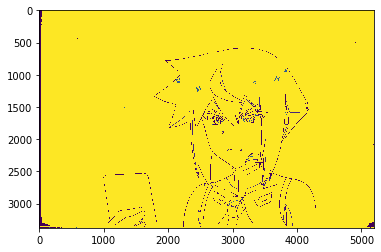

In [10]:
img = cv2.imread('A0005-_1_.jpg',0)
plt.imshow(img)
plt.show()
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

In [11]:
cv2.imwrite('th1.jpg', th1)
cv2.imwrite('th2.jpg', th2)
cv2.imwrite('th3.jpg', th3)

True

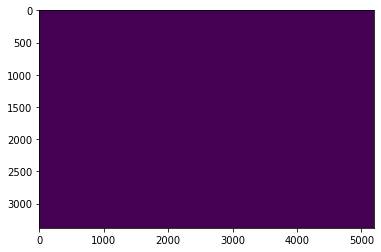

In [7]:
kernel = np.ones((7, 7),np.uint8)
erosion = cv2.morphologyEx(th1, cv2.MORPH_ERODE, kernel, iterations = 2)
cv2.imwrite('erosion.jpg', erosion)
plt.imshow(erosion)
plt.show()

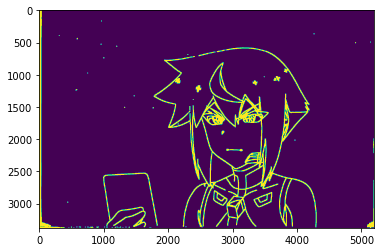

In [39]:
ret, thresh1 = cv2.threshold(erosion, 127, 255, 1)
blur = cv2.blur(thresh1, (15, 15))
plt.imshow(blur)
plt.show()

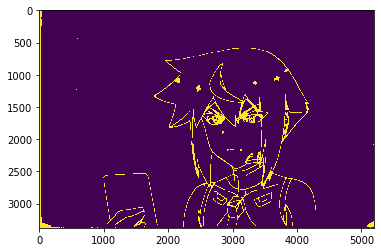

In [40]:
#---- I again performed another threshold on this image to get the central portion of the edge ----

ret, thresh2 = cv2.threshold(blur, 145, 255, 0)

#---- And then performed morphological erosion to thin the edge. For this I used an ellipse structuring element of kernel size 5 ----

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
final = cv2.morphologyEx(thresh2, cv2.MORPH_ERODE, kernel1, iterations = 2)
plt.imshow(final)
plt.show()

In [41]:
cv2.imwrite('final.jpg', final)

True